# Модуль А. Анализ и предобработка данных

## Импортирование библиотек

In [5]:
#
import pandas as pd

#
import matplotlib.pyplot as plt

#
import numpy as np

#
import os, shutil

#
from collections import defaultdict

## Анализ и предобработка даных

Создам датафрейм, куда помещу пути ко всем файлам

In [5]:
os.getcwd()

'd:\\Helper\\MLBazyak\\chemp\\NLP-summary\\Module1'

In [3]:
#
data_dir = '../Data/DATASET/'
#
print(os.path.exists(data_dir))
print(len(os.listdir(data_dir)))

True
1002


In [4]:
#
if not os.path.exists('database.pkl'):
    #
    df = pd.DataFrame(columns=['filename', 'annotation', 'tags', 'text'])

    #
    ind = 0
    #
    for folder in os.listdir(data_dir):
        #
        folder_path = os.path.join(data_dir, folder)
        #
        folder_data = os.listdir(folder_path)
        #
        df.loc[ind] = [
            folder,
            os.path.join(folder_path, folder_data[0]),
            os.path.join(folder_path, folder_data[1]),
            os.path.join(folder_path, folder_data[2])
        ]
        #
        ind+=1

    #
    print(df.shape)
    pd.to_pickle(df, 'database.pkl')
#
df = pd.read_pickle('database.pkl')
#
df.head()

filename                           annotation  \
0        1     ../Data/DATASET/1\annotation.txt   
1       10    ../Data/DATASET/10\annotation.txt   
2      100   ../Data/DATASET/100\annotation.txt   
3     1000  ../Data/DATASET/1000\annotation.txt   
4     1001  ../Data/DATASET/1001\annotation.txt   

                            tags                           text  
0     ../Data/DATASET/1\tags.txt     ../Data/DATASET/1\text.txt  
1    ../Data/DATASET/10\tags.txt    ../Data/DATASET/10\text.txt  
2   ../Data/DATASET/100\tags.txt   ../Data/DATASET/100\text.txt  
3  ../Data/DATASET/1000\tags.txt  ../Data/DATASET/1000\text.txt  
4  ../Data/DATASET/1001\tags.txt  ../Data/DATASET/1001\text.txt

фильтруем по заспамленности

In [6]:
#
wordlist = []
#
word_stats = defaultdict(int)
#
for i in range(df.shape[0]):
    annotation_path = df.loc[i]['tags']
    #
    with open(annotation_path, 'r', encoding='utf-8') as file:
        #
        for word in file.read().split():
            #
            word_stats[word] +=1
            #
            wordlist.append(word.replace(',', '').lower())

full_word = ''
# wordlist = list(set(wordlist))
for word in wordlist:
    full_word+=f' {word}'



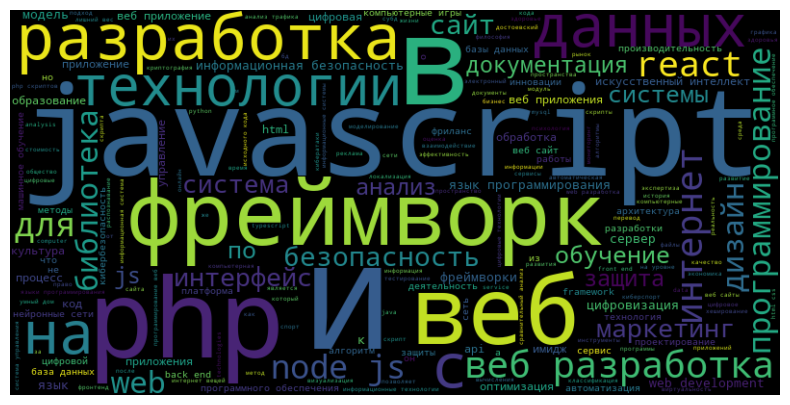

In [7]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(full_word)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

d:\Helper\MLBazyak\chemp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


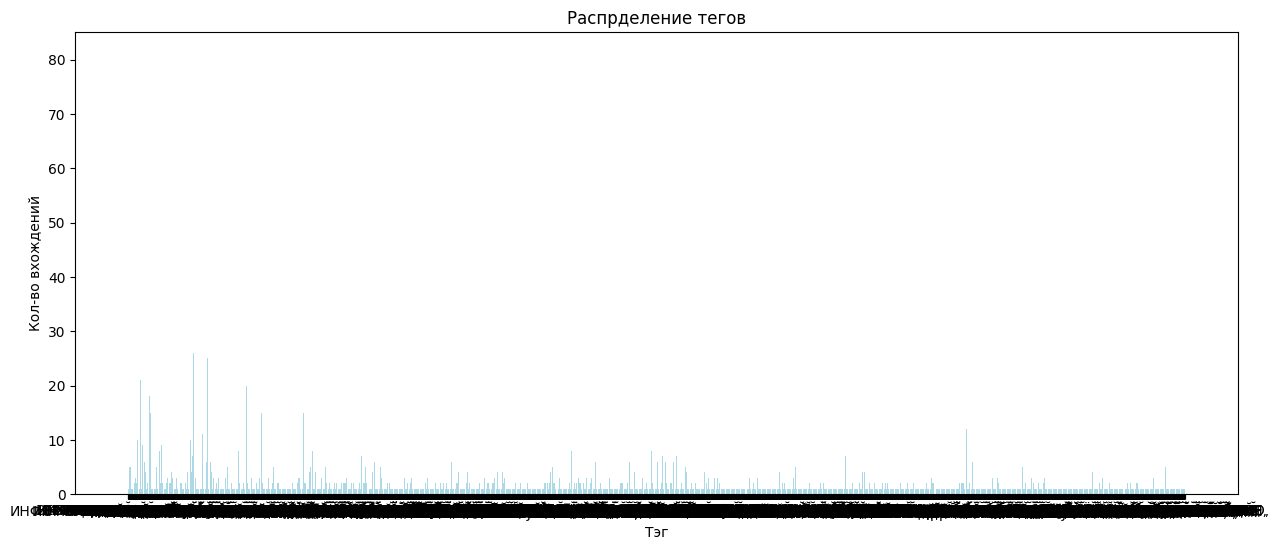

In [8]:
#
words, stats = word_stats.keys(), word_stats.values()

#
plt.figure(figsize=(15,6))
plt.bar(words, stats, color='lightblue')
plt.title('Распрделение тегов')
plt.xlabel('Тэг')
plt.ylabel('Кол-во вхождений')
plt.show()

In [34]:

msg_path = r'C:\Users\alzot\Downloads\Telegram Desktop\ChatExport_2025-02-26'

In [ ]:
import os
from bs4 import BeautifulSoup

# Путь к папке с HTML-файлами
folder_path = msg_path

# Функция для извлечения текста сообщений из одного файла
def extract_messages_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    soup = BeautifulSoup(html_content, 'html.parser')
    messages = soup.find_all('div', class_='text')
    
    extracted_messages = []
    for message in messages:
        extracted_messages.append(message.get_text(strip=True))
    
    return extracted_messages

# Проход по всем файлам в папке
all_messages = []
for filename in os.listdir(folder_path):
    if filename.endswith('.html'):  # Обрабатываем только HTML-файлы
        file_path = os.path.join(folder_path, filename)
        print(f"Обработка файла: {filename}")
        messages = extract_messages_from_file(file_path)
        all_messages.extend(messages)

# Сохранение всех сообщений в один файл (опционально)
with open('all_messages.txt', 'w', encoding='utf-8') as output_file:
    for message in all_messages:
        output_file.write(message + '\n')

Обработка файла: messages.html
Обработка файла: messages10.html
Обработка файла: messages11.html
Обработка файла: messages12.html
Обработка файла: messages13.html
Обработка файла: messages14.html
Обработка файла: messages15.html
Обработка файла: messages16.html
Обработка файла: messages17.html
Обработка файла: messages18.html
Обработка файла: messages19.html
Обработка файла: messages2.html
Обработка файла: messages20.html
Обработка файла: messages21.html
Обработка файла: messages22.html
Обработка файла: messages23.html
Обработка файла: messages24.html
Обработка файла: messages25.html
Обработка файла: messages26.html
Обработка файла: messages27.html
Обработка файла: messages28.html
Обработка файла: messages29.html
Обработка файла: messages3.html
Обработка файла: messages30.html
Обработка файла: messages31.html
Обработка файла: messages32.html
Обработка файла: messages33.html
Обработка файла: messages34.html
Обработка файла: messages35.html
Обработка файла: messages36.html
Обработка файл

In [40]:
from tqdm import tqdm

In [41]:
full = ''
for message in tqdm(all_messages, desc='Loading..', unit='msg'):
    full += f" {message.replace(',','').lower()}"


Loading..:   0%|          | 0/75489 [00:00<?, ?msg/s]

Loading..: 100%|██████████| 75489/75489 [02:21<00:00, 535.37msg/s] 


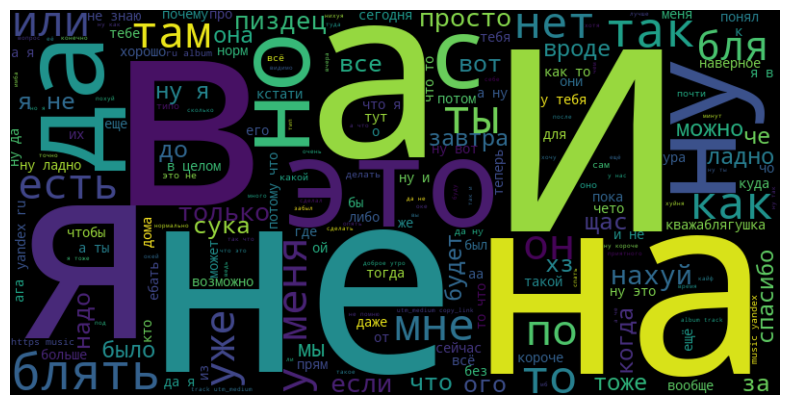

In [42]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(full)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [54]:
import nltk
from nltk.corpus import stopwords

# Скачиваем стоп-слова для русского языка
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Добавляем свои слова-паразиты
stop_words.update({"ну", "типа", "как бы", "вот", "слыш", "бля", "блядская", "короче"})

def clean_text_nltk(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

text = "ну слыш короче я обиделся на тебя блядская блокада как бы ну вот"
cleaned_text = clean_text_nltk(full, stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alzot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

NameError: name 'WordCloud' is not defined